# Preparation of biased coexsistence simulations

In [2]:
import numpy as np, sys, os, glob
import matplotlib.pylab as plt
import MDAnalysis

In [7]:
standard_sim=os.path.abspath('270K-1bar')
press_box = np.genfromtxt('../1-Bulk/avg_IceIh_box.dat')
single_pressure='2500.0bar'
print(press_box)

[[   0.      18.152   23.595   22.199]
 [1000.      18.114   23.52    22.122]
 [2000.      18.052   23.452   22.062]
 [2500.      18.028   23.417   22.025]
 [3000.      18.003   23.382   21.988]]


In [8]:
sims = dict()
for a in press_box[:]:
    fold='COEX_{}bar/'.format(a[0])
    #print(fold)
    if single_pressure==None or single_pressure in fold:
        sims[fold] = dict()
        sims[fold]['p']=a[0]
        sims[fold]['lx']=a[1]
        sims[fold]['lz']=a[3]

        os.system('cp -r 270K-1bar {}'.format(fold))


NameError: name 'pri' is not defined

### Create new initial configurations with box size according to pressure

In [9]:
for fold in sims.keys():
    sim=sims[fold]
   
    # Scale box
    u = MDAnalysis.Universe(fold+'water.data', in_memory=True)
    u.coord.positions[:,0] = u.coord.positions[:,0]*sim['lx']/u.dimensions[0]
    u.coord.positions[:,2] = u.coord.positions[:,2]*sim['lz']/u.dimensions[2]
    u.dimensions[0]=sim['lx']
    u.dimensions[2]=sim['lz']

    # Store lammps data
    u.atoms.write(fold+'water.data')

/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


### Make template folder

In [10]:
for fold in sims.keys():
    sim=sims[fold]
   
    

    # Create template folder
    template_fold=fold+'template'
    cmd=''
    cmd=cmd+'mkdir  -p {}\n'.format(template_fold)
    cmd=cmd+'mv {}* {}/\n'.format(fold,template_fold)
    os.system(cmd)

mv: rename COEX_2500.0bar/template to COEX_2500.0bar/template/template: Invalid argument


In [11]:
for fold in sims.keys():
    sim=sims[fold]
    os.system('sed -i \'\'  "s#variable .* pressure .*#variable        pressure equal {}#g" {}/template/in.pressure'.format(sim['p'],fold))
    

### Setup different temperatures

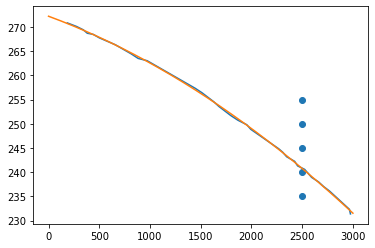

In [13]:
tip4p_vega_data=np.genfromtxt('tip4p_ice_iceIh_liquid.csv')
tip4p_vega_data[:,1]=tip4p_vega_data[:,1]*10
melt_fn = np.poly1d(np.polyfit(tip4p_vega_data[:,1], tip4p_vega_data[:,0], 3))

Ps=np.linspace(0,3000,200)
plt.plot(tip4p_vega_data[:,1],tip4p_vega_data[:,0])
plt.plot(Ps,melt_fn(Ps))

for fold in sims.keys():
    p=sims[fold]['p']
    T_m=melt_fn(p)
    T_range=np.round((T_m+np.arange(-5,20,5))/5, decimals=0)*5
    sims[fold]['temps']=T_range
    plt.scatter(p+T_range*0,T_range)

In [14]:
for fold in sims.keys():
    sim=sims[fold]
    for t in sim['temps']:
        temp_fold = '{}{}K'.format(fold,t)
        cmd='mkdir -p {}\n'.format(temp_fold)
        cmd+='cp {}template/* {}/\n'.format(fold,temp_fold)
        cmd+='sed -i \'\' \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp\n'.format(t,temp_fold)
        cmd+='sed -i \'\' \"s#TEMP=270#TEMP={}#g\" {}/plumed*.dat'.format(t,temp_fold)
        
        #cmd+='sed -i \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp'.format(t,temp_fold)
        print(cmd)
        os.system(cmd)

mkdir -p COEX_2500.0bar/235.0K
cp COEX_2500.0bar/template/* COEX_2500.0bar/235.0K/
sed -i '' "s#variable.*temperature.*#variable        temperature equal 235.0#g" COEX_2500.0bar/235.0K/in.temp
sed -i '' "s#TEMP=270#TEMP=235.0#g" COEX_2500.0bar/235.0K/plumed*.dat
mkdir -p COEX_2500.0bar/240.0K
cp COEX_2500.0bar/template/* COEX_2500.0bar/240.0K/
sed -i '' "s#variable.*temperature.*#variable        temperature equal 240.0#g" COEX_2500.0bar/240.0K/in.temp
sed -i '' "s#TEMP=270#TEMP=240.0#g" COEX_2500.0bar/240.0K/plumed*.dat
mkdir -p COEX_2500.0bar/245.0K
cp COEX_2500.0bar/template/* COEX_2500.0bar/245.0K/
sed -i '' "s#variable.*temperature.*#variable        temperature equal 245.0#g" COEX_2500.0bar/245.0K/in.temp
sed -i '' "s#TEMP=270#TEMP=245.0#g" COEX_2500.0bar/245.0K/plumed*.dat
mkdir -p COEX_2500.0bar/250.0K
cp COEX_2500.0bar/template/* COEX_2500.0bar/250.0K/
sed -i '' "s#variable.*temperature.*#variable        temperature equal 250.0#g" COEX_2500.0bar/250.0K/in.temp
sed -i '' "s#TEMP=

### Convert notebook to python script

In [8]:
!jupyter nbconvert --to script Prepare_coexsistence.ipynb

[NbConvertApp] Converting notebook Prepare_coexsistence.ipynb to script
[NbConvertApp] Writing 2385 bytes to Prepare_coexsistence.py
